# Customer Churn Analysis Report
**Analysis of Telecom Customer Data**
Dataset from kaggle [https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data]

## Overview
This analysis examines customer behavior patterns, spending habits, and churn rates to understand:
- Who our customers are (new vs established)
- How much they spend monthly and total
- Which customers stay loyal vs those who leave
- Key insights for business strategy

**Dataset:** 7,043 telecom customers with 21 attributes including tenure, charges, and churn status.




In [151]:
# Import the pandas and numpy libraries
import pandas as pd
import numpy as np

## First Look at the Data
Time to see what we're working with. Going to check the shape, data types, and peek at the first few rows to understand the structure.



In [152]:
#  reading the file via csv methood 
df = pd.read_csv(r"C:\Users\Rishi\OneDrive\Desktop\jupter\WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [153]:
#  viewing the first 6 rows of tha data 
df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [154]:
#  checking the size of the data
df.shape

(7043, 21)

In [155]:
#  selecing a random sample of the data 
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3997,6023-GSSXW,Female,0,Yes,No,69,Yes,No,DSL,No,...,No,No,No,Yes,Two year,Yes,Credit card (automatic),61.45,4131.2,No
4892,8875-AKBYH,Male,1,No,No,20,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.35,1745.2,No
4470,8242-JSVBO,Male,0,No,No,7,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.65,322.5,No


In [156]:
#  checking the info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [157]:
# Get some description of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [158]:
# checking index information 
df.index

RangeIndex(start=0, stop=7043, step=1)

In [159]:
# checking the column 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

most of them are categorical the only MonthlyCharges', 'TotalCharges', 'Churn are nummerical column 
and maths make sense on them 

In [160]:
# Check data types of the "numerical" candidates
print(df['tenure'].dtype)
print(df['MonthlyCharges'].dtype) 
print(df['TotalCharges'].dtype)
#  but here we find out that total charges is not numerical  so we need to change its type to it so yea 

int64
float64
object


In [161]:
# Convert 'TotalCharges' to a numerical data type, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for new null values created by the conversion
print(df.isnull().sum())


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [162]:
df['TotalCharges'].max()
#  checking is maths works on that column or not  

8684.8

In [163]:
#  checking for null values anything which is good for removal  
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [164]:
# selecting data based on labels and rows 
df.loc[0:10]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Okay, data is clean and not null. Let's move towards Exploratory Data Analysis.

In [165]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
#  replacing Multtiple lines with  no 

## Basic Stats Analysis 

Alright so now the data is cleaned up, let's see what our customers actually look like with some basic stats.

Going to check out:
- How long customers stay with us (tenure in months)
- Their monthly billing amount (MonthlyCharges - this is standardized to monthly even if they pay yearly)
- Total money they've spent over their lifetime with us (TotalCharges)


 We Want to see averages, ranges, and spread to understand our customer spending patterns and loyalty.


In [166]:
# Contract breakdown - both counts and percentages
pd.DataFrame({
    'Count': df['Contract'].value_counts(),
    'Percentage': df['Contract'].value_counts(normalize=True) * 100
}).round(1)


,Count,Percentage
Contract,,
Month-to-month,3875,55.0
Two year,1695,24.1
One year,1473,20.9


## Contract Breakdown

So what we see here:

- 55% of customers are month-to-month - they can bail anytime, probably high churn risk
- 24% locked in for 2 years - these are our loyal customers  
- 20% on 1-year deals - somewhere in between

More than half our customers have zero commitment. That's probably why we're seeing churn issues.



## Time for Some Graphs

Now let's make some visualizations to see patterns in the data. Going to use matplotlib and seaborn - they're the standard Python tools for making charts.

This will help us spot outliers and understand customer behavior visually.


In [167]:
#  importing  visualization tools 
# Import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns


In [168]:
#  finding the summary stats
summary_stats = pd.DataFrame({
    'Range': [df[col].max() - df[col].min() for col in cols],
    'Variance': [df[col].var() for col in cols], 
    'Std Dev': [df[col].std() for col in cols]
}, index=cols)

summary_stats.round(2)

,Range,Variance,Std Dev
tenure,72.0,603.17,24.56
MonthlyCharges,100.5,905.41,30.09
TotalCharges,8666.0,5138252.41,2266.77


## Deep Dive: Customer Tenure Analysis

Let's focus on understanding our customer loyalty patterns by analyzing the tenure distribution.

We'll answer key business questions and understand what this weird shape is telling us about our customer base.


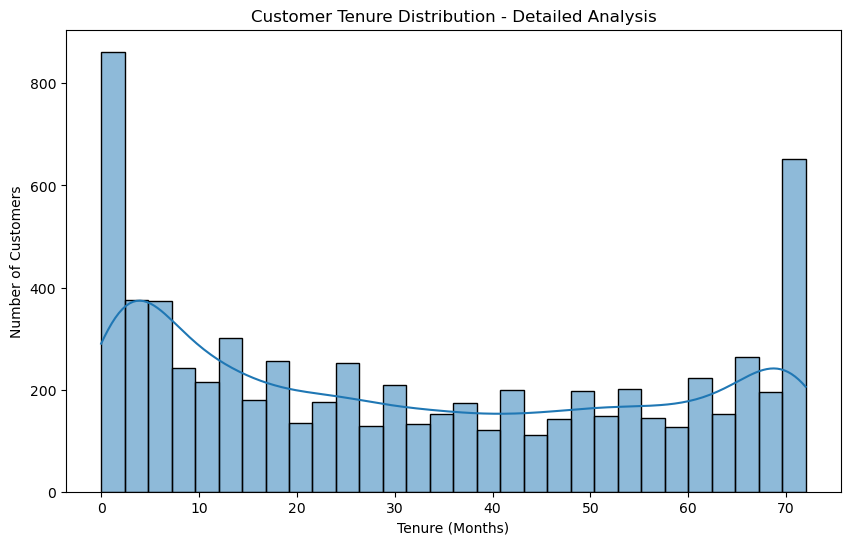

In [169]:
# tenure for detailed analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Customer Tenure Distribution - Detailed Analysis')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()


In [170]:
# Customer segmentation analysis
new_customers = df[df['tenure'] <= 6]['tenure'].count()
established_customers = df[df['tenure'] > 24]['tenure'].count()
total_customers = df['tenure'].count()


customer_analysis = pd.DataFrame({
    'Segment': ['New customers (0-6 months)', 'Established customers (24+ months)'],
    'Count': [new_customers, established_customers],
    'Percentage': [
        (new_customers / total_customers) * 100,
        (established_customers / total_customers) * 100
    ]
}).round(1)

customer_analysis



,Segment,Count,Percentage
0,New customers (0-6 months),1481,21.0
1,Established customers (24+ months),3833,54.4


Looking at the  customer list and found that about 21% of my customers are new (they joined in the last 6 months), and 54% have been with us for a long time (over 2 years).
This shows me what percentage of customers is loyal and and how many are new 



In [171]:
# "Do customers who stay longer pay more money each month?"
# 
new_customers_avg = df[df['tenure'] <= 6]['MonthlyCharges'].mean()
growing_customers_avg = df[(df['tenure'] > 6) & (df['tenure'] <= 24)]['MonthlyCharges'].mean()
established_customers_avg = df[df['tenure'] > 24]['MonthlyCharges'].mean()

# Put it in a nice table
spending_by_loyalty = pd.DataFrame({
    'Customer_Type': ['New (0-6 months)', 'Growing (6-24 months)', 'Established (24+ months)'],
    'Average_Monthly_Bill': [
        new_customers_avg.round(2),
        growing_customers_avg.round(2), 
        established_customers_avg.round(2)
    ]
})

spending_by_loyalty


,Customer_Type,Average_Monthly_Bill
0,New (0-6 months),54.74
1,Growing (6-24 months),60.38
2,Established (24+ months),70.61


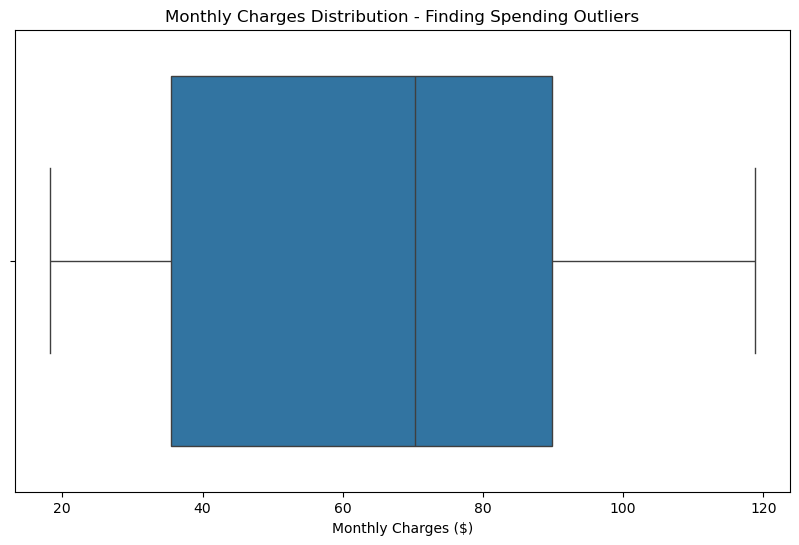

,Customer_Type,Count
0,High Spenders (>$100),"(902, 21)"
1,Low Spenders (<$25),"(1389, 21)"


In [172]:
# Find and count outlier customers
high_spenders = df[df['MonthlyCharges'] > 100]
low_spenders = df[df['MonthlyCharges'] < 25]

# Summary table
spending_outliers = pd.DataFrame({
    'Customer_Type': ['High Spenders (>$100)', 'Low Spenders (<$25)'],
     'Count': [high_spenders.shape, low_spenders.shape]

})

# Visualize with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Monthly Charges Distribution - Finding Spending Outliers')
plt.xlabel('Monthly Charges ($)')
plt.show()

# Show the counts
spending_outliers



## My Key Observations

From analyzing this customer data, I found:

- Most customers pay between $35-$90 monthly, with $70 being typical
 About half of the customers (54%) have been with us over 2 years - that's great loyalty!
- Loyal customers pay about $16 more per month than new customers
- We have both budget customers $25  and premium customers $100+
- Most customers prefer flexible month-to-month contracts

This shows we're good at keeping customers long-term and they're willing to pay more as they stay longer.


In [173]:
# Count how many customers left vs stayed
churn_percent = df['Churn'].value_counts(normalize=True) * 100
churn_percent.round(1)
churn_percent

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

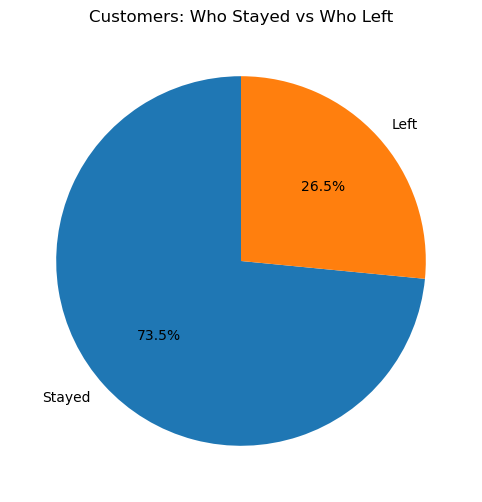

,Status,Count,Percentage
0,Stayed with us,5174,73.5
1,Left us,1869,26.5


In [174]:
# Count how many customers left vs stayed
churn_data = df['Churn'].value_counts()

# Create a simple pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_data.values, labels=['Stayed', 'Left'], autopct='%1.1f%%', startangle=90)
plt.title('Customers: Who Stayed vs Who Left')
plt.show()

# Also show the actual numbers
churn_summary = pd.DataFrame({
    'Status': ['Stayed with us', 'Left us'],
    'Count': churn_data.values,
    'Percentage': (churn_data.values / churn_data.sum() * 100).round(1)
})

churn_summary


In [175]:
customer=df['Churn']=="Yes"

## What I Found Out About Customer Leaving

From my analysis, I discovered:
-73.5%of customers left us (the "Yes" group)  
26.5%% of customers stayed with us 



In [176]:
# See the spread of total spending
df['TotalCharges'].describe().round(2)


count    7032.00
mean     2283.30
std      2266.77
min        18.80
25%       401.45
50%      1397.48
75%      3794.74
max      8684.80
Name: TotalCharges, dtype: float64

In [177]:
#  find the big spenders
big_spenders = df[df['TotalCharges'] > 5000]
big_spenders_count = big_spenders.shape[0]  # Add  here!

# Summary table
spending_summary = pd.DataFrame({
    'Customer_Group': ['Big Spenders (>$5000)', 'Regular Spenders'],
    'Count': [big_spenders_count, df.shape[0] - big_spenders_count] 
})

spending_summary


,Customer_Group,Count
0,Big Spenders (>$5000),1135
1,Regular Spenders,5908


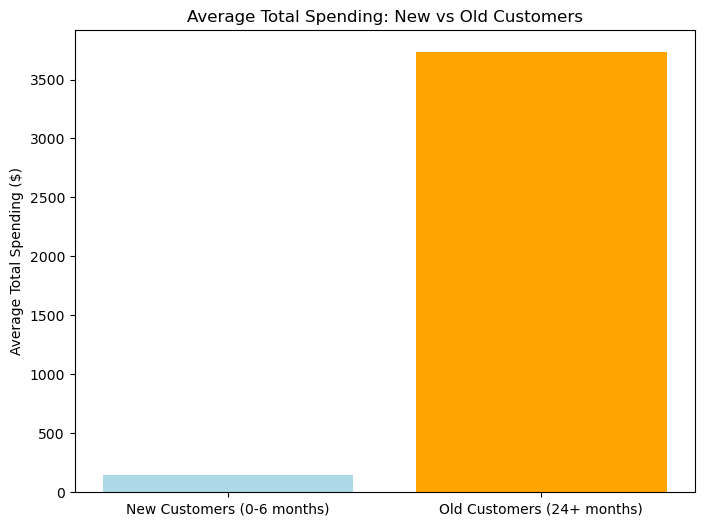

In [178]:
# Compare total spending between new and old customers

new_customers_total = df[df['tenure'] <= 6]['TotalCharges'].mean()

old_customers_total = df[df['tenure'] > 24]['TotalCharges'].mean()

# Create simple bar chart
customer_groups = ['New Customers (0-6 months)', 'Old Customers (24+ months)']
spending_amounts = [new_customers_total, old_customers_total]

plt.figure(figsize=(8, 6))
plt.bar(customer_groups, spending_amounts, color=['lightblue', 'orange'])
plt.title('Average Total Spending: New vs Old Customers')
plt.ylabel('Average Total Spending ($)')
plt.show()

In [179]:
# Find big spenders who left us
big_spenders_who_left = df[(df['TotalCharges'] > 5000) & (df['Churn'] == 'Yes')]
big_spenders_who_left_count = big_spenders_who_left.shape[0]

# Find big spenders who stayed
big_spenders_who_stayed = df[(df['TotalCharges'] > 5000) & (df['Churn'] == 'No')]
big_spenders_who_stayed_count = big_spenders_who_stayed.shape

# Simple summary
print(f"Big spenders who left: {big_spenders_who_left_count}")
print(f"Big spenders who stayed: {big_spenders_who_stayed_count}")


Big spenders who left: 157
Big spenders who stayed: (978, 21)


## Leave Rate by Customer Value Segment

This bar chart compares the percentage of customers who churn (“left”) among:
- **High spenders** (total charges > \$3 000)
- **Regular spenders** (total charges ≤ \$3 000)

It shows which group is more prone to leave.


High spenders total: 2204
High spenders who left: 350
Regular customers total: 4839
Regular customers who left: 1519
High spenders leave rate: 15.9%
Regular customers leave rate: 31.4%


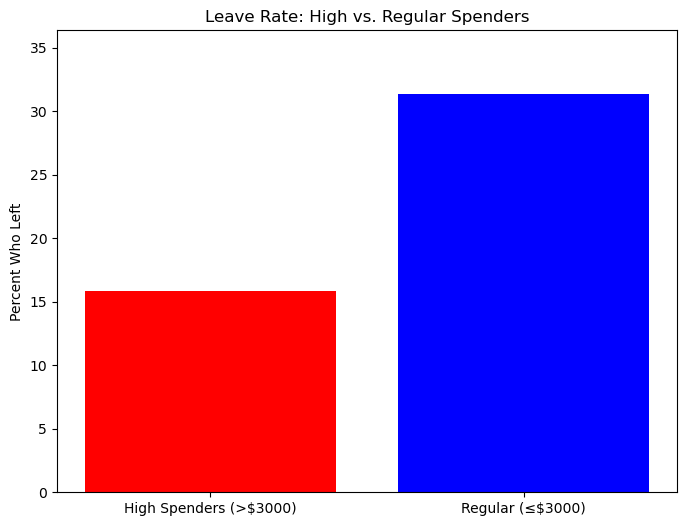

In [180]:
# copmaring churn rates
high_mask = (df['TotalCharges'] > 3000)
left_mask = (df['Churn'] == 'Yes')


high_total = len(df[high_mask])
high_left = len(df[high_mask & left_mask])

regular_total = len(df[~high_mask])
regular_left = len(df[~high_mask & left_mask])

print(f"High spenders total: {high_total}")
print(f"High spenders who left: {high_left}")
print(f"Regular customers total: {regular_total}")
print(f"Regular customers who left: {regular_left}")

high_rate = (high_left / high_total * 100) if high_total else 0
regular_rate = (regular_left / regular_total * 100) if regular_total else 0

print(f"High spenders leave rate: {high_rate:.1f}%")
print(f"Regular customers leave rate: {regular_rate:.1f}%")

# Step 4: Bar chart
plt.figure(figsize=(8,6))
plt.bar(['High Spenders (>$3000)', 'Regular (≤$3000)'],
        [high_rate, regular_rate],
        color=['red', 'blue'])
plt.title('Leave Rate: High vs. Regular Spenders')
plt.ylabel('Percent Who Left')
plt.ylim(0, max(high_rate, regular_rate) + 5)
plt.show()


## Key Business Insights & Recommendations

1. **Leverage loyalty:** 54% are with us 2+ years  
2. **Reward tenure:** Established customers pay more  
3. **Reduce churn:** 26.5% is slightly above average  
4. **Retain big spenders:** Focus on those paying \>\$3 000  

**Action:**  
- Early-stage retention for 6–24 mo segment  
- Exclusive offers for 24+ mo customers  
- Track and support customers with high lifetime spend


In [181]:
# will help if you tell me what should i imoprve more 